# Machine learning & Analytics 




<div class="alert alert-block alert-info">
                                  <h1><center>vitruvius</center></h1>
    <h3><center>Construction works app (project graduation)</center></h3>
</div>

![](logo.png,width)


### 1- objective

##### Description of features or columns

    Some common themes among most of these features are:

    |"Location"|: Neighborhood
    |"Size"|: all of the Area and SF features, and counts like FullBath and GarageCars
    |"Quality"|: all of the Qual features
    |"Year"|: YearBuilt and YearRemodAdd
    |"Types"|: descriptions of features and styles like Foundation and GarageType

![](pic.png)

## "MSSubClass": Identifies the type of dwelling involved in the sale.	


![](pics/mssc.png)



        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

 ## "OverallQual" : Rates the overall material and finish of the house


![](pics/ov.png)


     
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

## "Neighborhood": Physical locations within Ames city limits

![](pics/ng.png)

    SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

## "GrLivArea": Above grade (ground) living area square feet       


![](pics/glv.png)

## "BsmtQual": Evaluates the height of the basement


![](pics/bsq.png)

## "Foundation": Type of foundation

![](pics/found.png)

#### "Foundation": Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
       

<div class="alert alert-block alert-info">
                                  <h1><center>Read & Split Data</center></h1>
</div>

In [30]:
import pandas as pd 
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np

In [17]:
X=pd.read_csv("ames.csv")


<AxesSubplot:>

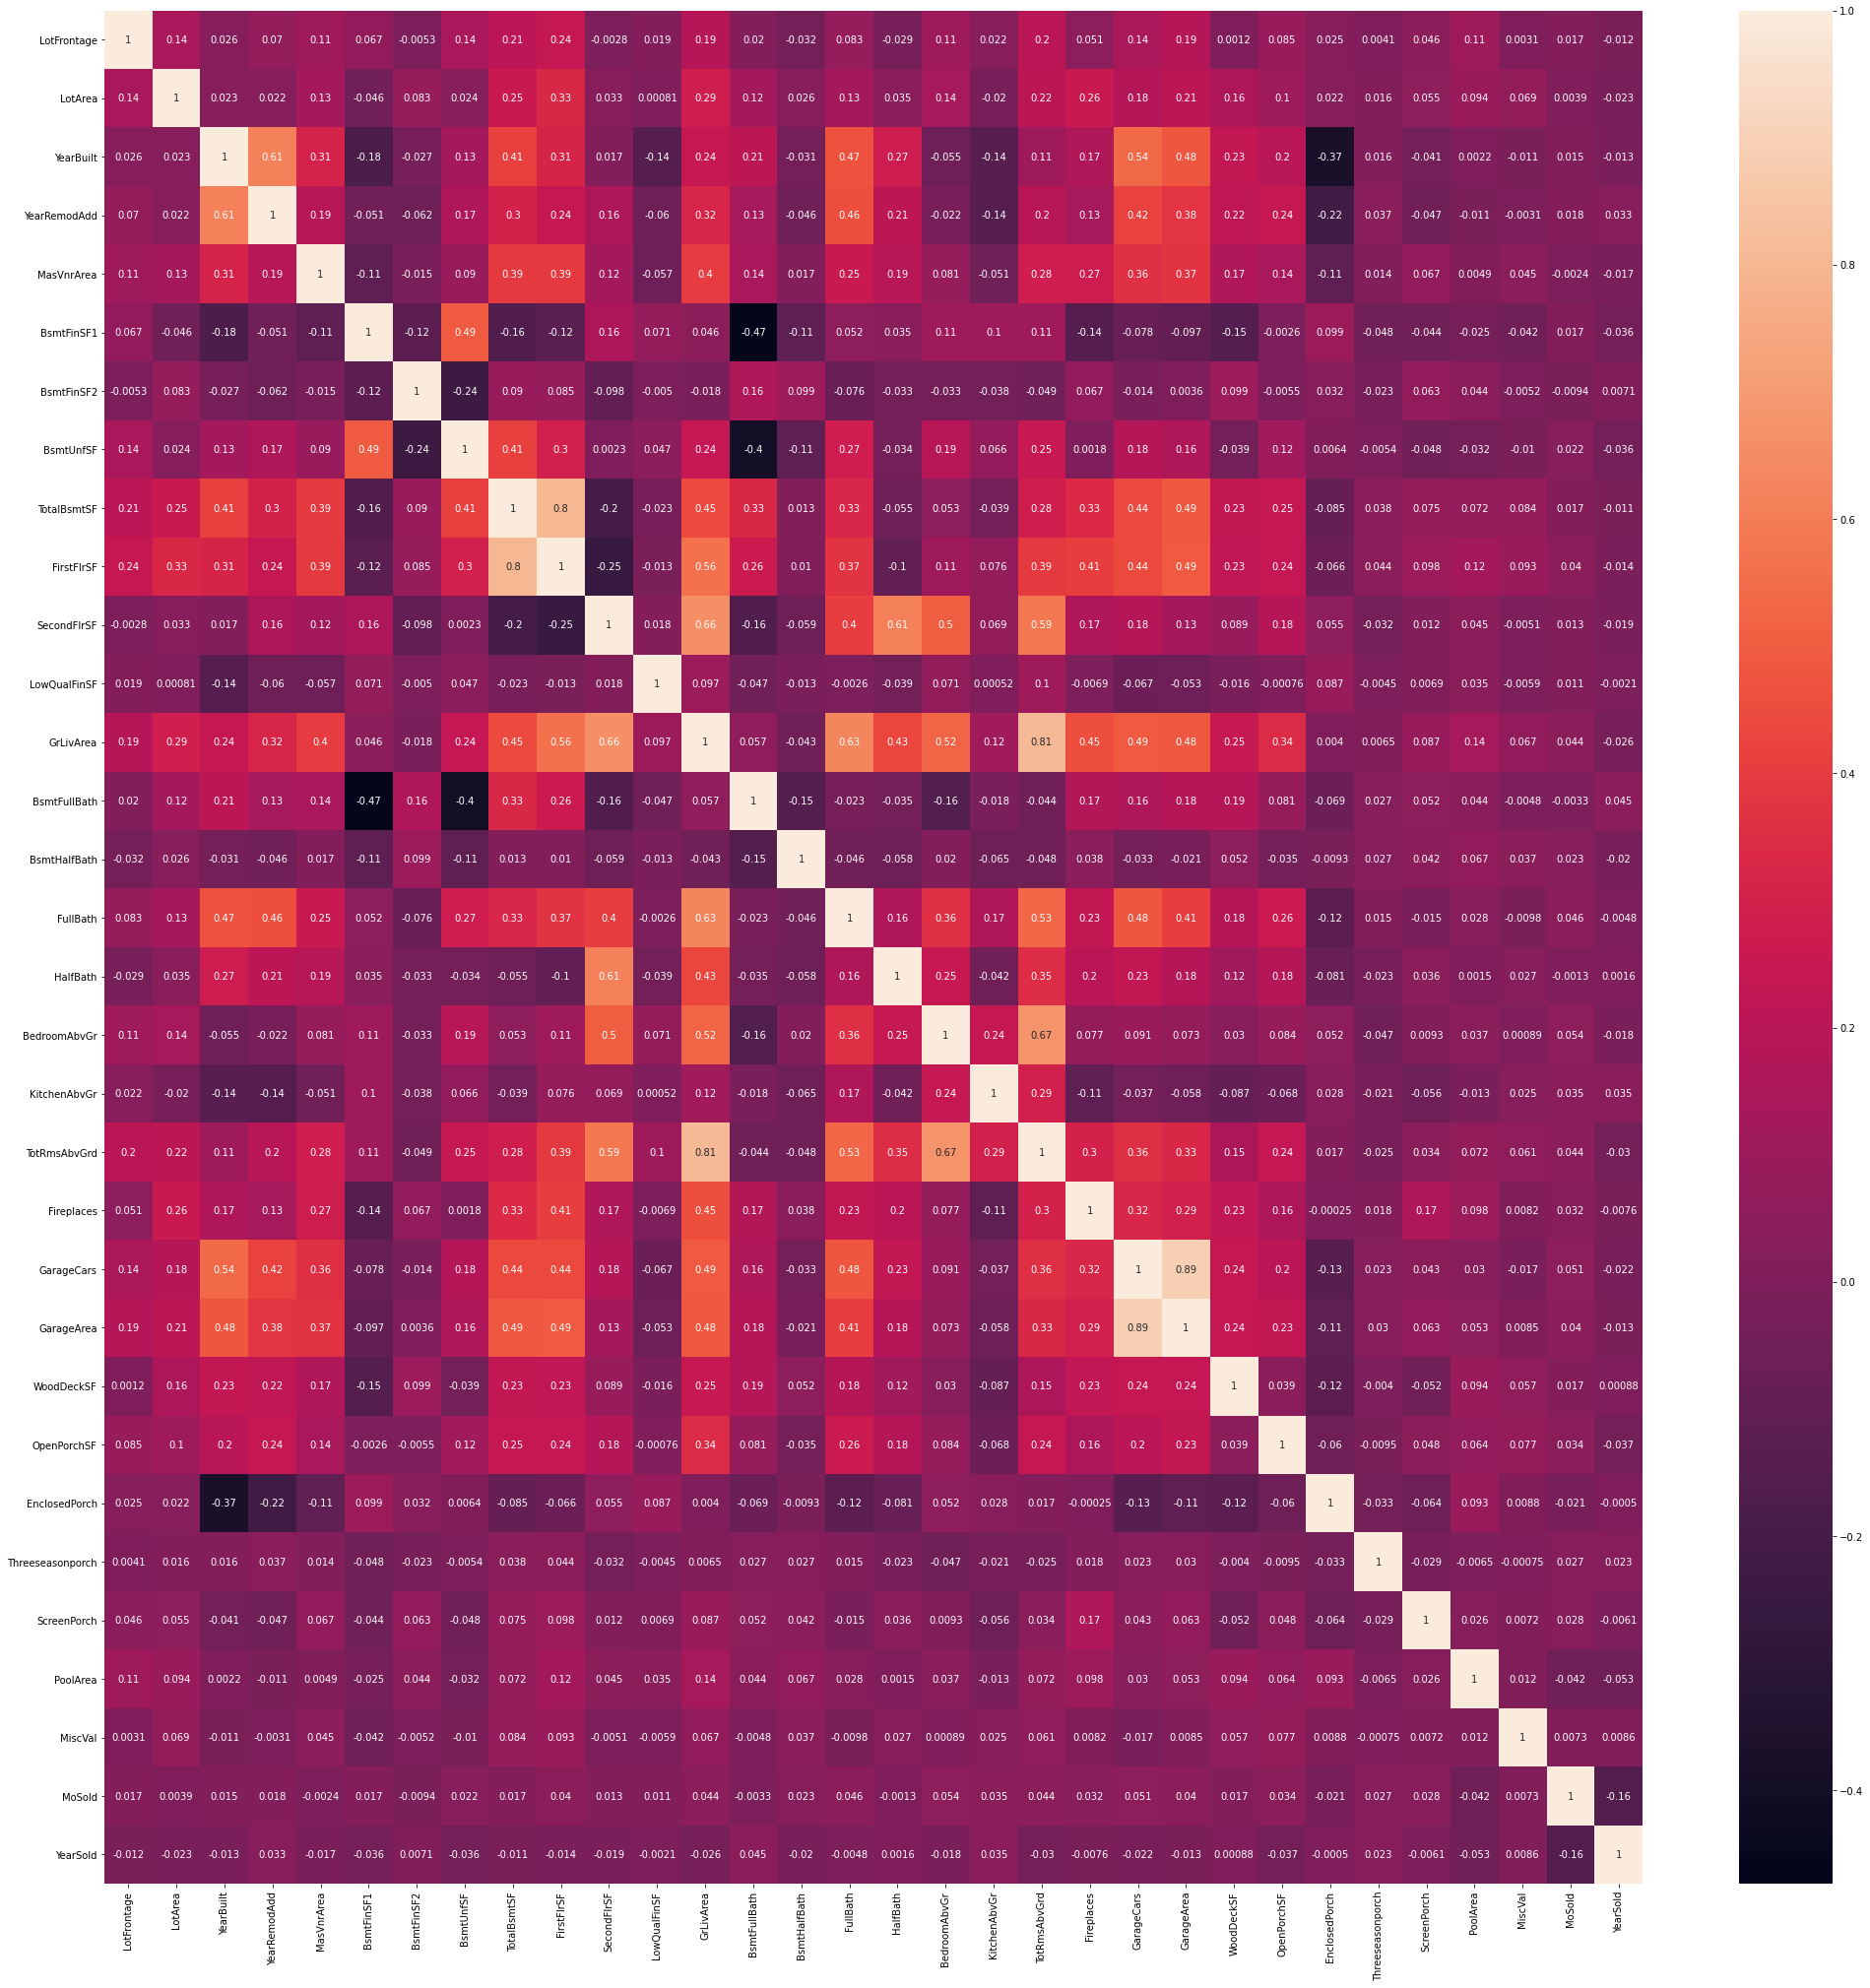

In [27]:
plt.figure(figsize=(35,35))
import seaborn as sns
sns.heatmap(X.corr(),annot=True)


In [29]:
corr=X.corr().unstack().sort_values(kind='quicksort',ascending=False)
corr=corr[corr!=1]
print(corr[:10])
print('================')
print()

GarageCars    GarageArea      0.889866
GarageArea    GarageCars      0.889866
TotRmsAbvGrd  GrLivArea       0.807772
GrLivArea     TotRmsAbvGrd    0.807772
TotalBsmtSF   FirstFlrSF      0.800429
FirstFlrSF    TotalBsmtSF     0.800429
TotRmsAbvGrd  BedroomAbvGr    0.672647
BedroomAbvGr  TotRmsAbvGrd    0.672647
SecondFlrSF   GrLivArea       0.655251
GrLivArea     SecondFlrSF     0.655251
dtype: float64


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split



# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [20]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,120.0,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal


<div class="alert alert-block alert-info">
                                  <h1><center>Feature Engineering</center></h1>
</div>

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [22]:
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if 
                   set(X_valid[col]).issubset(set(X_train[col]))]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be ordinal encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be ordinal encoded: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Exterior2nd', 'Neighborhood', 'RoofMatl', 'MiscFeature']


In [40]:
from sklearn.preprocessing import OrdinalEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

ordinal_encoder = OrdinalEncoder()
label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])

In [41]:
print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Ordinal Encoding):
16829.647690557453


In [42]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


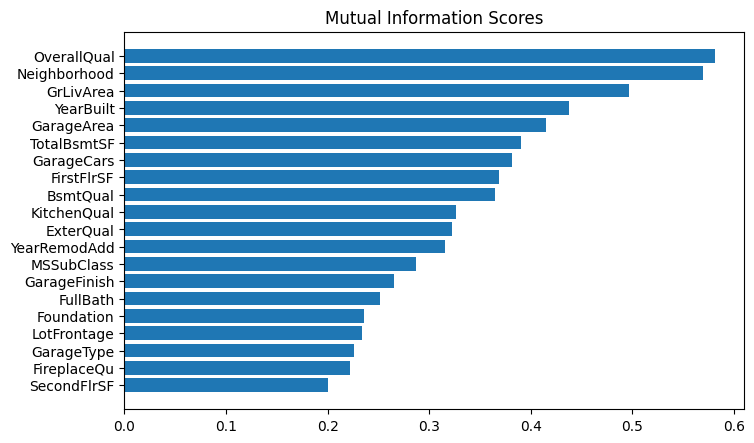

In [43]:
mi_scores= make_mi_scores(X, y)
print(mi_scores.head(20)) 

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

In [44]:
my_featrue=list(mi_scores.head(20).index)

In [47]:
my_featrue

['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'GarageArea',
 'TotalBsmtSF',
 'GarageCars',
 'FirstFlrSF',
 'BsmtQual',
 'KitchenQual',
 'ExterQual',
 'YearRemodAdd',
 'MSSubClass',
 'GarageFinish',
 'FullBath',
 'Foundation',
 'LotFrontage',
 'GarageType',
 'FireplaceQu',
 'SecondFlrSF']

## most values effective in my_features based on sales_price


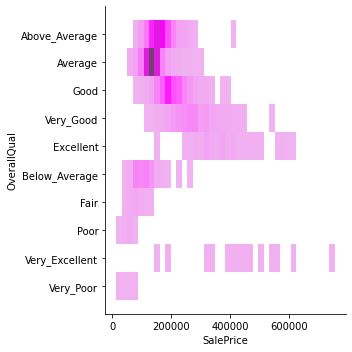

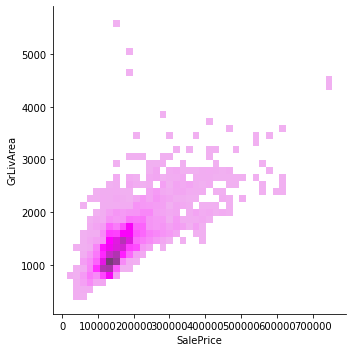

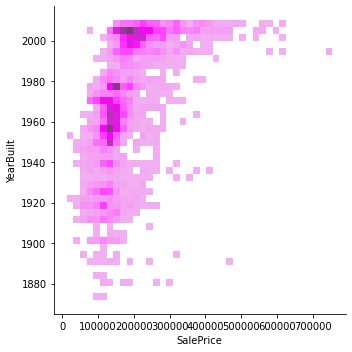

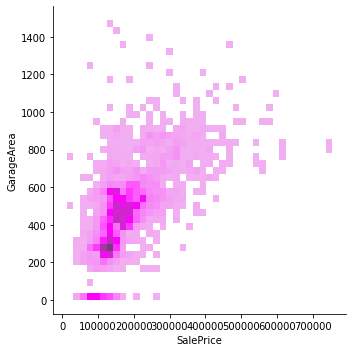

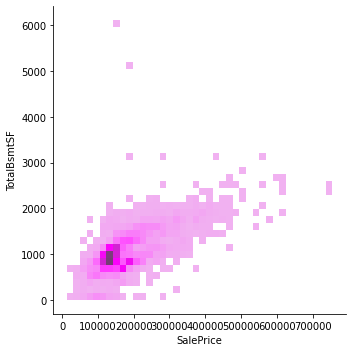

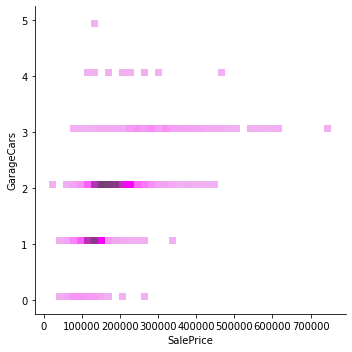

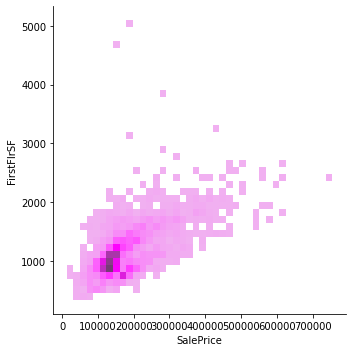

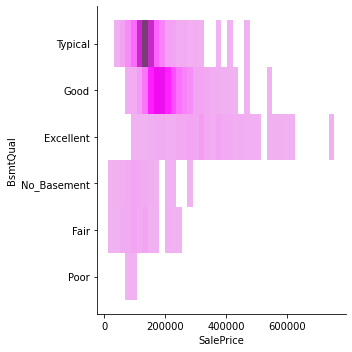

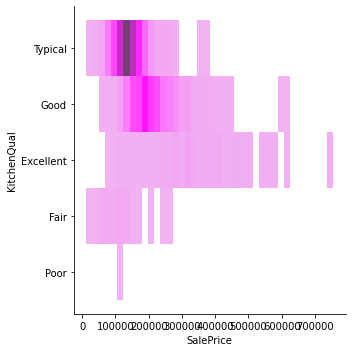

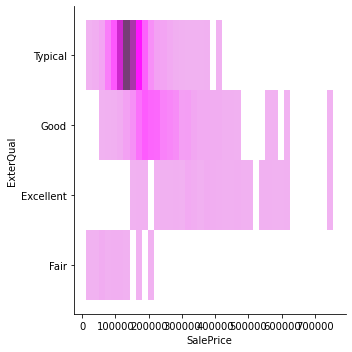

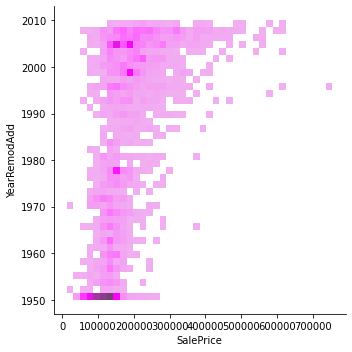

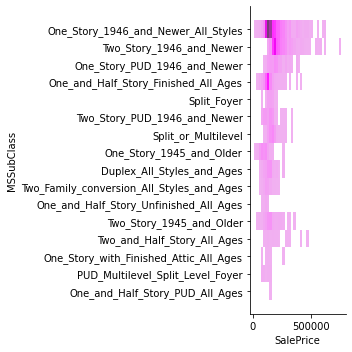

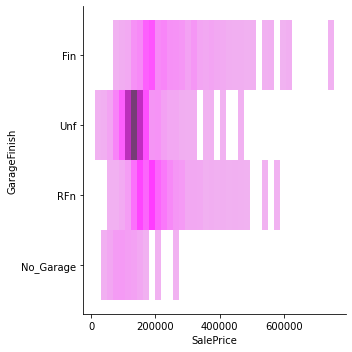

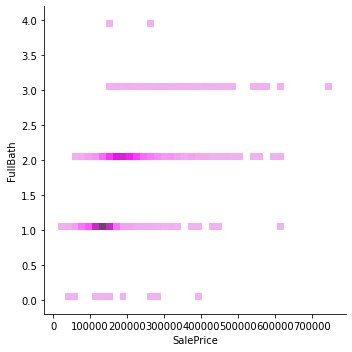

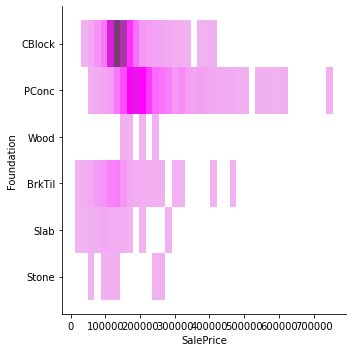

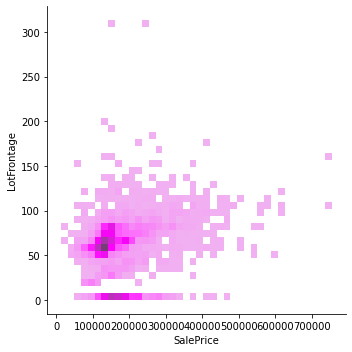

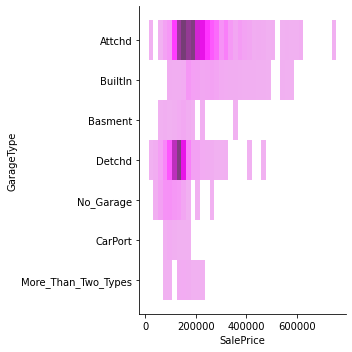

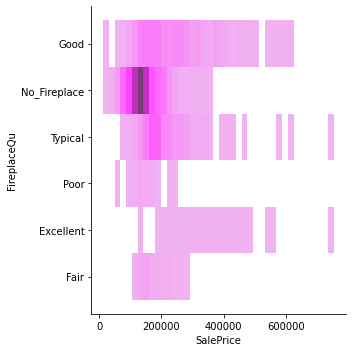

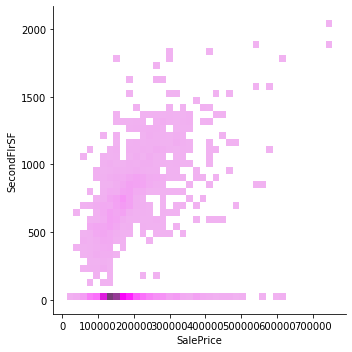

In [51]:
import seaborn as sns
def plot_rel_featues():
    for item in my_featrue:
        plo = sns.displot(data=X[my_featrue],x=y,y=X[item], bins=40, color='m')
    return plo
plot_rel_featues()

In [57]:
X_TRAIN=label_X_train[my_featrue]
X_VAL =label_X_valid[my_featrue]

In [53]:
X_VAL.head()

,OverallQual,GrLivArea,YearBuilt,GarageArea,TotalBsmtSF,GarageCars,FirstFlrSF,BsmtQual,KitchenQual,ExterQual,YearRemodAdd,MSSubClass,GarageFinish,FullBath,Foundation,LotFrontage,GarageType,FireplaceQu,SecondFlrSF
2216,0.0,1991.0,1932,432.0,854.0,2,1096.0,5.0,4.0,3.0,1950,5.0,3.0,1,1.0,0.0,4.0,2.0,895.0
836,1.0,990.0,1994,440.0,990.0,1,990.0,5.0,4.0,3.0,1994,2.0,2.0,1,2.0,65.0,0.0,3.0,0.0
2396,8.0,1970.0,2006,753.0,1085.0,3,1120.0,2.0,0.0,2.0,2006,13.0,0.0,2,2.0,86.0,2.0,2.0,850.0
1962,1.0,1134.0,1960,254.0,1010.0,1,1134.0,5.0,4.0,3.0,2002,2.0,2.0,1,1.0,70.0,0.0,3.0,0.0
305,2.0,1178.0,1900,384.0,859.0,1,859.0,5.0,4.0,3.0,1950,5.0,2.0,1,4.0,66.0,4.0,3.0,319.0


<div class="alert alert-block alert-info">
                                  <h1><center>import library for Machine Learning models</center></h1>
</div>

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso




In [55]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "XGB" :  XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(n_jobs=-1, n_estimators=1000, max_depth=7, random_state=17),
    "LS": Lasso(alpha=0.1)
    
    
}

<div class="alert alert-block alert-info">
                                  <h1><center>fit a models</center></h1>
</div>

In [56]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(X_TRAIN, y_train)
    y_pred=model.predict(X_VAL)
    print(f'Training Score: {model.score(X_TRAIN, y_train)}')
    print(f'Test Score: {model.score(X_VAL, y_valid)}')
#     print(f'MSE: {model.mean_squared_error(y_test, y_pred)}')
    print('Root Mean Squared Error:${:,.02f}'.format(np.sqrt(mean_squared_error(y_valid, y_pred))))
    print('R2_score:',r2_score(y_valid,y_pred))
    print('-'*30)

Using model: LR
Training Score: 0.8095432152503592
Test Score: 0.7397906226074744
Root Mean Squared Error:$41,331.90
R2_score: 0.7397906226074744
------------------------------
Using model: KNNR
Training Score: 0.8405962054397698
Test Score: 0.7364016470426406
Root Mean Squared Error:$41,600.18
R2_score: 0.7364016470426406
------------------------------
Using model: XGB
[07:03:20] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Training Score: 0.9623025444398973
Test Score: 0.8576623030445463
Root Mean Squared Error:$30,569.18
R2_score: 0.8576623030445463
------------------------------
Using model: DT
Training Score: 0.9997930877497652
Test Score: 0.6278447558532059
Root Mean Squared Error:$49,429.47
R2_score: 0.6278447558532059
------------------------------
Using model: RF
Training Score: 0.935840048321686
Test Score: 0.8100409088220215
Root Mean Squared Error:$35,314.57
R2_score: 0.810040

C:\Users\DELL\anaconda31\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1408675364235.4722, tolerance: 1484098736.6291611
  positive)


In [58]:
cat_feature=X[my_featrue].select_dtypes(include="object")
cat_feature.columns.unique

<bound method Index.unique of Index(['OverallQual', 'BsmtQual', 'KitchenQual', 'ExterQual', 'MSSubClass',
       'GarageFinish', 'Foundation', 'GarageType', 'FireplaceQu'],
      dtype='object')>

In [59]:
v=list(cat_feature.OverallQual.unique())

In [60]:
def unique():
    for col in cat_feature.columns:
        uni=cat_feature[col].unique()
        print(f"{col}:\n {uni} equal\n {X_TRAIN[col].unique()}")
        print(f"num_of_uni:{len(uni)}")
        print(50*"##")

In [61]:
# unique()

In [62]:
X_VAL.shape

(586, 19)

In [63]:
cat_feature.head()

,OverallQual,BsmtQual,KitchenQual,ExterQual,MSSubClass,GarageFinish,Foundation,GarageType,FireplaceQu
0,Above_Average,Typical,Typical,Typical,One_Story_1946_and_Newer_All_Styles,Fin,CBlock,Attchd,Good
1,Average,Typical,Typical,Typical,One_Story_1946_and_Newer_All_Styles,Unf,CBlock,Attchd,No_Fireplace
2,Above_Average,Typical,Good,Typical,One_Story_1946_and_Newer_All_Styles,Unf,CBlock,Attchd,No_Fireplace
3,Good,Typical,Excellent,Good,One_Story_1946_and_Newer_All_Styles,Fin,CBlock,Attchd,Typical
4,Average,Good,Typical,Typical,Two_Story_1946_and_Newer,Fin,PConc,Attchd,Typical


In [64]:
num_featr=X[my_featrue].select_dtypes(exclude="object")
num_featr.shape

(2930, 10)

<div class="alert alert-block alert-info">
                                  <h1><center>more accurate  Machine Learning model</center></h1>
                                   <h3><center> <b>XGB_REGRESSOR</b></center></h3>
</div>

In [65]:
model=XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [66]:
model.fit(X_TRAIN,y_train)
y_predict_XGB=model.predict(X_VAL)


[07:05:28] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [67]:
r2_score(y_valid,y_predict_XGB)

0.8576623030445463

In [68]:
x_tst=np.array([[0,800,2000,600,1000,1,1050,3,3,2,2001,11,1,2,2,55,2,2,320]])

In [78]:
y_tst=model.predict(x_tst)
print(y_tst.astype(int)[0])

164280


<div class="alert alert-block alert-info">
                                  <h1><center>Export Model</center></h1>
                                  
</div>

In [ ]:
import joblib
joblib.dump(model,'XGB.ml')

In [ ]:
L_modl=joblib.load('XGB.ml')

In [ ]:
L_modl.predict(x_tst)

In [ ]:
X_VAL.head()

In [ ]:
!jt -t ""

In [6]:
!jt -l


Available Themes: 
   chesterish

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.



   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl
